# zz

In [1]:
zs = 0.53

sehirler=["Adana", "Adıyaman", "Afyon", "Ağrı", "Amasya", "Ankara", "Antalya", "Artvin", "Aydın", "Balıkesir", 
          "Bilecik", "Bingöl", "Bitlis", "Bolu", "Burdur", "Bursa", "Çanakkale", "Çankırı", "Çorum", "Denizli", 
          "Diyarbakır", "Edirne", "Elazığ", "Erzincan", "Erzurum", "Eskişehir", "Gaziantep", "Giresun", "Gümüşhane", 
          "Hakkari", "Hatay", "Isparta", "Mersin", "İstanbul", "İzmir", "Kars", "Kastamonu", "Kayseri", "Kırklareli", 
          "Kırşehir", "Kocaeli", "Konya", "Kütahya", "Malatya", "Manisa", "Kahramanmaraş", "Mardin", "Muğla", "Muş", 
          "Nevşehir", "Niğde", "Ordu", "Rize", "Sakarya", "Samsun", "Siirt", "Sinop", "Sivas", "Tekirdağ", "Tokat", 
          "Trabzon", "Tunceli", "Şanlıurfa", "Uşak", "Van", "Yozgat", "Zonguldak", "Aksaray", "Bayburt", "Karaman", 
          "Kırıkkale", "Batman", "Şırnak", "Bartın", "Ardahan", "Iğdır", "Yalova", "Karabük", "Kilis", "Osmaniye", "Düzce"]

for i in range(len(sehirler)):
    sehirler[i] = sehirler[i].lower()
    sehirler[i] = sehirler[i].replace('i̇','i')

# Import libraries

In [203]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from scipy.stats import mode

from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#### accuracy_calculate function

In [204]:
def accuracy_calculate(actual_values, predicted_values):

  comparison = abs(np.round(predicted_values) - actual_values)
  accuracy = 1- ((len(comparison[comparison>=(0+1)])) / len(actual_values))

  return accuracy

#### mean_iou_calculator function

In [205]:
def mean_iou_calculator(actual_values, predicted_values, time):
  confusion_array = confusion_matrix(actual_values, predicted_values)
  individual_ious = []
  for i in range(len(confusion_array)):
    individual_iou = confusion_array[i][i] / (sum(confusion_array[i]))
    individual_ious.append(individual_iou)
  mean_iou = sum(individual_ious)/len(individual_ious)
  results = pd.DataFrame()  
  featue_y_values = sorted(data[time].unique())
  for i in range(len(individual_ious)):
    results.insert(0, 'iou_(' + str(featue_y_values[i])  +')', [individual_ious[i]], True)
  results = results[results.columns[::-1]]
  results.insert(0, 'mean_iou', mean_iou, True)
  return results

# Start

In [250]:
data = pd.read_csv('gulle.csv', sep=';', encoding = "utf8")
data.columns = ['product', 'amount', 'company', 'town', 'type', 'order date', 'delivery date', 'time'] #Rearannge the dataframe as the old one

data2 = data.drop('delivery date', axis = 1)
data2["order day"] = ''
data2["order month"] = ''
data2["week day"] = ''


# Remove 'order date' and add 'order day', 'order month' and 'week day' features
for i in range(len(data2)):
  data2.at[i, 'order day'] = data2['order date'][i].split()[0]
  data2.at[i, 'order month'] = data2['order date'][i].split()[1]
  data2.at[i, 'week day'] = data2['order date'][i].split()[-1]
data2 = data2.drop('order date', axis = 1)
data2['week day'] = data2['week day'].str.replace('Pazartesi','pts')
data2['week day'] = data2['week day'].str.replace('Salı','sal')
data2['week day'] = data2['week day'].str.replace('Çarşamba','çrş')
data2['week day'] = data2['week day'].str.replace('Perşembe','prş')
data2['week day'] = data2['week day'].str.replace('Cumartesi','cts')
data2['week day'] = data2['week day'].str.replace('Cuma','cum')
data2['week day'] = data2['week day'].str.replace('Pazar','paz')

# data2 = data2[data2["week day"].str.contains("Pazar") == False]

# Rearranging Dataframe
data2 = data2[['product', 'company', 'amount', 'town', 'type', 'order day', 'week day', 'order month', 'time']]
data2['town'] = data2['town'].str.lower()
data2['town'] = data2['town'].str.replace('i̇','i')
data2['town'] = data2['town'].str.replace('.','missing')
data2['town'] = data2['town'].str.replace(' tekirdağ','tekirdağ')
data2['town'] = data2['town'].str.replace('küçükçekmece','istanbul')
data2['town'] = data2['town'].str.replace('çorlu','tekirdağ')
data2['town'] = data2['town'].str.replace('bandirma','balıkesir')

#data2 = data2.drop('town',axis = 1).reset_index(drop=True)
data2 = data2.drop('order day',axis = 1).reset_index(drop=True)
data2 = data2.drop('order month',axis = 1).reset_index(drop=True)
data2 = data2.fillna("missing")
#data2 = data2[data2["town"].str.contains("missing") == False]

data_clean = data2.copy()
drop_df = data2.copy()
drop_index_list = []

data2

C:\Users\egeme\AppData\Local\Temp\ipykernel_1548\3280315253.py:30: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data2['town'] = data2['town'].str.replace('.','missing')


,product,company,amount,town,type,week day,time
0,K477,T-029,1,bursa,1,pts,2
1,K669,T-016,1,istanbul,1,cum,4
2,K75,T-018,1,istanbul,1,çrş,1
3,K669,T-016,1,istanbul,1,pts,1
4,K513,T-034,1,istanbul,1,sal,1
...,...,...,...,...,...,...,...
1111,K522,T-034,960,istanbul,1,sal,1
1112,K730,T-060,960,tekirdağ,1,pts,4
1113,K788,T-060,960,tekirdağ,1,pts,4
1114,K1117,T-0211,960,kocaeli,1,sal,1


In [251]:
data2[data2["product"]=="K1046"]

,product,company,amount,town,type,week day,time
527,K1046,T-060,60,tekirdağ,1,pts,2
534,K1046,T-060,60,tekirdağ,1,pts,1
542,K1046,T-060,60,tekirdağ,1,pts,1
543,K1046,T-0142,60,missing,1,sal,1
704,K1046,T-060,120,tekirdağ,1,çrş,1
724,K1046,T-060,120,tekirdağ,1,prş,1
728,K1046,T-060,120,tekirdağ,1,cum,3
730,K1046,T-060,120,tekirdağ,1,pts,1
736,K1046,T-060,120,tekirdağ,1,pts,2
746,K1046,T-060,120,tekirdağ,1,prş,4


# Get list of abroad companies and products that are supplied from abroad

In [252]:
abr = [item for item in data2["town"].unique() if item not in sehirler]
abr_str = ""

for i in range (len(abr)):
    abr_str = abr_str + "|" + abr[i]
abr_str = abr_str[1:]

if len(abr) != 0:
    data3 = data2[data2["town"].astype('str').str.contains(abr_str) == True]
    abr_comp_list = data3["company"].unique()
    abr_prod_list = data3["product"].unique()
    print("abroad company list: ",abr_comp_list)
    print("abroad product list: ",abr_prod_list)
else:
    print("no abroad company")


abroad company list:  ['T-0142' 'MZ-401']
abroad product list:  ['K730' 'K390' 'MRL313' 'K1046' 'K143' 'K664' 'K9' 'K389' 'K256' 'K395']


# Remove insufficient data

In [253]:
def remove_insuff(df, ft):
    print("removing insufficient data for ", ft, "...")
    fst_len = len(df)
    x = df[ft].value_counts() < 5 
    df2 = x.to_frame().reset_index()
    df2.columns = [ft, 'booly']
    df2.drop(df2[df2.booly == False].index, inplace=True)
    drop_list = df2[ft].tolist()
    drop_indices=[]

    if len(drop_list) != 0:
        for i in df.index:
            for j in range(len(drop_list)):
                if (drop_list[j] == df.at[i, ft]):
                    drop_indices = drop_indices + [i]
        df.drop(drop_indices, inplace=True)
        
    else:
        drop_indices = []
                        
    lst_len = len(df)
    rem = fst_len - lst_len      # number of removed data
    per = (rem / fst_len) * 100  # percentage of removed data

    print("total number of removed data: ", rem)
    print("persentage of removed data: ", round(per, 2), "%")
    return df, drop_indices

In [254]:
data2, drop_indices = remove_insuff(data2, "company")
drop_index_list = drop_index_list + drop_indices

data2, drop_indices = remove_insuff(data2, "product")
drop_index_list = drop_index_list + drop_indices

removing insufficient data for  company ...
total number of removed data:  32
persentage of removed data:  2.87 %
removing insufficient data for  product ...
total number of removed data:  169
persentage of removed data:  15.59 %


# Clean noise

In [255]:
def clean_noise(df): 
    in_len = len(df)
    zs = 0.53
    
    n_prod = df["product"].nunique()
    prod_list = df["product"].unique()
    n_comp = df["company"].nunique()
    comp_list = df["company"].unique()
    
    print("Cleaning noise ... ")
    
    index_drop_list = []
    for prod in prod_list:

        df_max_scaled = df[df["product"] == prod].copy()

        for comp in comp_list:
            df_max_scaled2 = df_max_scaled[df_max_scaled["company"] == comp].copy()

            if len(df_max_scaled2) > 1:
                
                max_min_t = df_max_scaled2["time"].max() - df_max_scaled2["time"].min()
                max_min_a = df_max_scaled2["amount"].max() - df_max_scaled2["amount"].min()
                
                if (max_min_a != 0) and (max_min_t != 0):
                    df_max_scaled2["time"] = (df_max_scaled2["time"] - df_max_scaled2["time"].min()) / max_min_t
                    t_sc = df_max_scaled2[["time"]]
                    df_zscore_t = (t_sc - t_sc.mean())/t_sc.std()
                    dfz_t = abs(df_zscore_t) > zs

                    df_max_scaled2["amount"] = (df_max_scaled2["amount"] - df_max_scaled2["amount"].min()) / max_min_a
                    amo_sc = df_max_scaled2["amount"]
                    df_zscore_a = (amo_sc - amo_sc.mean())/amo_sc.std()
                    dfz_a = abs(df_zscore_a) > zs

                    df1 = dfz_t["time"] & dfz_a 
                    df2 = (df_zscore_t["time"] * df_zscore_a) < 0 
                    dfz = df1 & df2 

                    index_drop_list = index_drop_list + [*filter(dfz.get, dfz.index)]

    index_drop_list = sorted(list(set(index_drop_list)))
    df.drop(index_drop_list, axis=0, inplace=True)
    rem = len(index_drop_list)
    f_len = len(df)
    n_del = in_len - f_len
    per = (n_del / in_len) * 100
    
    print("deleted indices: ",index_drop_list)
    print("total number of removed data: ", n_del)
    print("persentage of removed data: ", round(per, 2), "%")
    
    return df, index_drop_list

In [256]:
def clean_noise_tt(df): 
    in_len = len(df)
    zst = 1.5
    
    n_prod = df["product"].nunique()
    prod_list = df["product"].unique()
    n_comp = df["company"].nunique()
    comp_list = df["company"].unique()
        
    print("Cleaning noise ... ")
    
    index_drop_list = []
    for prod in prod_list:

        df_max_scaled = df[df["product"] == prod].copy()

        for comp in comp_list:
            df_max_scaled2 = df_max_scaled[df_max_scaled["company"] == comp].copy()

            if len(df_max_scaled2) > 1:
                
                max_min_t = df_max_scaled2["time"].max() - df_max_scaled2["time"].min()
                
                if (max_min_t != 0):
                    df_max_scaled2["time"] = (df_max_scaled2["time"] - df_max_scaled2["time"].min()) / max_min_t
                    t_sc = df_max_scaled2[["time"]]
                    df_zscore_t = (t_sc - t_sc.mean())/t_sc.std()
                    dfz_t = abs(df_zscore_t) > zst
                    
                    index_drop_list = index_drop_list + dfz_t[dfz_t["time"].eq(True)].index.tolist()
                    
                    #index_drop_list = index_drop_list + [*filter(dfz_t.get, dfz_t.index)]

    index_drop_list = sorted(list(set(index_drop_list)))
    df.drop(index_drop_list, axis=0, inplace=True)
    rem = len(index_drop_list)
    f_len = len(df)
    n_del = in_len - f_len
    per = (n_del / in_len) * 100
    
    print("deleted indices: ",index_drop_list)
    print("total number of removed data: ", n_del)
    print("persentage of removed data: ", round(per, 2), "%")
    
    return df, index_drop_list

In [257]:
pd.options.mode.chained_assignment = None

data2, train_drop_list = clean_noise(data2)
drop_index_list = drop_index_list + train_drop_list

Cleaning noise ... 
deleted indices:  [118, 185, 194, 196, 197, 218, 228, 247, 250, 254, 255, 310, 311, 316, 317, 356, 358, 361, 362, 372, 376, 377, 394, 397, 462, 475, 477, 490, 492, 494, 508, 532, 547, 549, 564, 569, 578, 581, 617, 639, 663, 673, 675, 684, 688, 689, 693, 701, 703, 707, 717, 720, 737, 742, 744, 745, 782, 787, 796, 802, 815, 819, 821, 834, 854, 897, 899, 903, 908, 934, 939, 948, 949, 953, 955, 956, 957, 967, 972, 982, 985, 1010, 1011, 1014, 1016, 1017, 1018, 1021, 1024, 1025, 1026, 1031, 1033, 1034, 1037, 1048, 1073, 1076, 1088, 1089, 1092, 1096, 1098, 1099, 1100, 1107, 1108, 1109, 1110, 1115]
total number of removed data:  110
persentage of removed data:  12.02 %


In [258]:
data2, train_drop_list = clean_noise_tt(data2)
drop_index_list = drop_index_list + train_drop_list

Cleaning noise ... 
deleted indices:  [23, 34, 53, 91, 94, 111, 114, 128, 139, 195, 209, 236, 238, 284, 286, 287, 306, 312, 336, 347, 454, 458, 502, 510, 540, 541, 552, 566, 628, 637, 651, 655, 659, 726, 746, 757, 763, 788, 798, 807, 812, 839, 840, 856, 879, 914, 917, 919, 920, 947, 950, 977, 981, 992, 1005, 1019, 1035, 1065, 1066, 1082]
total number of removed data:  60
persentage of removed data:  7.45 %


In [259]:
#data2["time"].value_counts()
data2.time.value_counts()[sorted(data2.time.unique())]

1     445
2     115
3      79
4      45
5      23
6      14
7       6
8       2
9       4
10      2
11      2
12      1
13      1
14      1
18      1
19      2
27      1
29      1
Name: time, dtype: int64

In [ ]:
def map_time(df):
    for i in df.index:
        if ((df.at[i, "time"]<=7) and (df.at[i, "time"]>=4)):
            df.at[i, "time"] = 4
        elif (df.at[i, "time"]>7):
            df.at[i, "time"] = 5
    return df
            

In [260]:
def map_time(df):
    for i in df.index:
        if ((df.at[i, "time"]<=7) and (df.at[i, "time"]>=4)):
            df.at[i, "time"] = 4
        elif (df.at[i, "time"]>7):
            df.at[i, "time"] = 5
    return df
            

# Map time

In [179]:
def map_time(df):
    for i in df.index:
        if ((df.at[i, "time"]<=4) and (df.at[i, "time"]>=3)):
            df.at[i, "time"] = 3
        elif ((df.at[i, "time"]<=7) and (df.at[i, "time"]>=5)):
            df.at[i, "time"] = 4
        elif ((df.at[i, "time"]<=14) and (df.at[i, "time"]>=8)):
            df.at[i, "time"] = 5
        elif ((df.at[i, "time"]<=30) and (df.at[i, "time"]>=15)):
            df.at[i, "time"] = 6
        elif (df.at[i, "time"]>30):
            df.at[i, "time"] = 7
    return df
            

In [261]:
data2 = map_time(data2)

# One - Hot - Encoding

In [262]:
def one_hot(df, ft):      ### ft = "company", "product", "week day" etc.
    print("one hot encoding ", ft, "...")
    dum = pd.get_dummies(df[ft])
    df = df.drop(ft, axis = 1)
    df = df.join(dum)
    print(ft, "encoded.")
    return df

In [263]:
data2  = one_hot(data2, "week day")
data2  = one_hot(data2, "company")
data2  = one_hot(data2, "product")
data2

one hot encoding  week day ...
week day encoded.
one hot encoding  company ...
company encoded.
one hot encoding  product ...
product encoded.


,amount,town,type,time,cts,cum,prş,pts,sal,çrş,...,K669,K688,K700,K730,K744,K746,K765,K788,K9,K980
0,1,bursa,1,2,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,kocaeli,1,3,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,1,kocaeli,1,3,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1,kocaeli,1,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
8,1,kocaeli,1,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,920,kocaeli,1,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1104,940,tekirdağ,1,3,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1111,960,istanbul,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1112,960,tekirdağ,1,4,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [264]:
#data2.drop(train_drop_list, axis=0, inplace=True)
#data2.drop(val_drop_list, axis=0, inplace=True)

# Drop_df

In [265]:
drop_index_list = sorted(list(set(drop_index_list)))
drop_df = drop_df.loc[drop_index_list]
drop_df

,product,company,amount,town,type,week day,time
1,K669,T-016,1,istanbul,1,cum,4
2,K75,T-018,1,istanbul,1,çrş,1
3,K669,T-016,1,istanbul,1,pts,1
4,K513,T-034,1,istanbul,1,sal,1
9,K637,T-015,1,istanbul,1,cum,7
...,...,...,...,...,...,...,...
1108,K788,T-060,960,tekirdağ,1,sal,1
1109,K788,T-060,960,tekirdağ,1,prş,1
1110,K730,T-0142,960,missing,1,prş,1
1114,K1117,T-0211,960,kocaeli,1,sal,1


In [266]:
data_clean.drop(drop_df.index.to_list(), axis=0, inplace=True)
data_clean

,product,company,amount,town,type,week day,time
0,K477,T-029,1,bursa,1,pts,2
5,K669,T-0211,1,kocaeli,1,cum,3
6,K669,T-0211,1,kocaeli,1,pts,3
7,K669,T-0211,1,kocaeli,1,pts,1
8,K669,T-0211,1,kocaeli,1,prş,1
...,...,...,...,...,...,...,...
1103,K669,T-0211,920,kocaeli,1,sal,1
1104,K788,T-060,940,tekirdağ,1,sal,3
1111,K522,T-034,960,istanbul,1,sal,1
1112,K730,T-060,960,tekirdağ,1,pts,4


# Drop town column

In [267]:
data2 = data2.drop('town',axis = 1).reset_index(drop=True)

In [268]:
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import EditedNearestNeighbours 
from collections import Counter

xt = data2.copy()
yt = data2.copy()
xt.drop("time", axis=1, inplace=True)
yt = yt["time"] 


print('Original dataset shape %s' % Counter(xt))
print(f'Original dataset samples per class {Counter(yt)}')

sm_obj = SMOTE(random_state=42, sampling_strategy='all', k_neighbors=4, n_jobs=-1)
enn_obj = EditedNearestNeighbours(sampling_strategy='all', n_neighbors=3, kind_sel='mode', n_jobs=-1)
sme = SMOTEENN(random_state=42, smote=sm_obj, enn=enn_obj, sampling_strategy='all', n_jobs=-1)

X_res, y_res = sme.fit_resample(xt, yt)
print('Resampled dataset shape %s' % Counter(y_res))
print(f'Resampled dataset shape {X_res.shape}')
x_train, y_train = X_res, y_res

Original dataset shape Counter({'amount': 1, 'type': 1, 'cts': 1, 'cum': 1, 'prş': 1, 'pts': 1, 'sal': 1, 'çrş': 1, 'T-0108': 1, 'T-0127': 1, 'T-0129': 1, 'T-0133': 1, 'T-0136': 1, 'T-0142': 1, 'T-015': 1, 'T-018': 1, 'T-019': 1, 'T-0210': 1, 'T-0211': 1, 'T-029': 1, 'T-034': 1, 'T-036': 1, 'T-052': 1, 'T-060': 1, 'T-074': 1, 'T-077': 1, 'T22': 1, 'BY-206': 1, 'BY-287': 1, 'BY-3562': 1, 'BY-496': 1, 'BY-721': 1, 'BY-768': 1, 'BY-788': 1, 'BY-801': 1, 'BY-810': 1, 'BY-812': 1, 'BY-834': 1, 'BY-849': 1, 'BY-OP02': 1, 'BY-OP57': 1, 'K1004': 1, 'K1010': 1, 'K1044': 1, 'K1046': 1, 'K1053': 1, 'K1061': 1, 'K1092': 1, 'K120': 1, 'K143': 1, 'K148': 1, 'K165': 1, 'K168': 1, 'K212': 1, 'K240': 1, 'K243': 1, 'K256': 1, 'K26': 1, 'K28': 1, 'K325': 1, 'K335': 1, 'K352': 1, 'K389': 1, 'K390': 1, 'K395': 1, 'K407': 1, 'K477': 1, 'K522': 1, 'K597': 1, 'K601': 1, 'K607': 1, 'K608': 1, 'K628': 1, 'K664': 1, 'K669': 1, 'K688': 1, 'K700': 1, 'K730': 1, 'K744': 1, 'K746': 1, 'K765': 1, 'K788': 1, 'K9': 1, 

# Train - Test Split

In [222]:
from sklearn.model_selection import train_test_split

X = data2.copy()
Y = data2.copy()
X.drop("time", axis=1, inplace=True)
Y = Y["time"]

x_train, x_val, y_train, y_val = train_test_split(X,Y, test_size = 0.3, random_state = 42)

In [223]:
def categorize(df):
    ls = df.columns.to_list()
    ls.remove("amount")
    df[ls] = df[ls].astype('category')
#     df['time'] = df['time'].cat.rename_categories({1:"1 gün", 2:"2 gün", 3:"3-4 gün", 4:"5-7 gün", 5:"8-14 gün", 6:"15-30 gün", 7:"+30 gün"})
    return df

In [224]:
# x_train = categorize(x_train)
# x_val = categorize(x_val)

# Normalize amount

In [225]:
xt_min = x_train["amount"].min()
xt_max = x_train["amount"].max()

x_train["amount"] = (x_train["amount"] - xt_min) / (xt_max - xt_min)
x_val["amount"] = (x_val["amount"] - xt_min) / (xt_max - xt_min)

# Create a df_empty with the same columns of x_train 

In [226]:
df_empty = x_train[0:0]
df_empty

,amount,type,cts,cum,prş,pts,sal,çrş,T-0108,T-0127,...,K669,K688,K700,K730,K744,K746,K765,K788,K9,K980


# PCA

In [227]:
def do_pca(x_train, x_val):
    from sklearn.decomposition import PCA
    xl = len(x_train.columns)
    pca = PCA(.95)
    pca.fit(x_train)
    print("number of features dropped from ", xl, " to ", pca.n_components_) 
    #print("variance ratio: ", pca.explained_variance_ratio_) 

    x_train = pca.transform(x_train)
    x_val = pca.transform(x_val)
    return pca, x_train, x_val

# SMOTE

#### SMOTENC
##### before pca for sure (there are categorical fts)

In [228]:
def get_categorical_fts(df):
    fts = list(df.columns)
    fts.remove('amount')
    return fts

In [229]:
# from imblearn.over_sampling import SMOTENC
# from collections import Counter

# print(f'Original dataset shape {x_train.shape}')
# print(f'Original dataset samples per class {Counter(y_train)}')

# # categorical features
# fts = list(range(1, ((x_train.shape[1]))))

# sm = SMOTENC(random_state=42, categorical_features=fts, sampling_strategy='all', k_neighbors=4, n_jobs=-1)
# X_res, y_res = sm.fit_resample(x_train, y_train)
# print(f'Resampled dataset samples per class {Counter(y_res)}')
# print(f'Resampled dataset shape {X_res.shape}')
# x_train, y_train = X_res, y_res

#### SMOTEENN
##### after pca?

In [230]:
pca, x_train, x_val = do_pca(x_train, x_val)

number of features dropped from  84  to  44


In [231]:
# from imblearn.combine import SMOTEENN
# from imblearn.over_sampling import SMOTE 
# from imblearn.under_sampling import EditedNearestNeighbours 
# from collections import Counter
# print('Original dataset shape %s' % Counter(y_train))
# print(f'Original dataset samples per class {Counter(y_train)}')

# sm_obj = SMOTE(random_state=42, sampling_strategy='all', k_neighbors=4, n_jobs=-1)
# enn_obj = EditedNearestNeighbours(sampling_strategy='all', n_neighbors=3, kind_sel='mode', n_jobs=-1)
# sme = SMOTEENN(random_state=42, smote=sm_obj, enn=enn_obj, sampling_strategy='all', n_jobs=-1)
# X_res, y_res = sme.fit_resample(x_train, y_train)
# print('Resampled dataset shape %s' % Counter(y_res))
# print(f'Resampled dataset shape {X_res.shape}')
# x_train, y_train = X_res, y_res

In [232]:
params = {'max_depth': 7.778449929951673,
 'min_samples_leaf': 3.343093555340267,
 'min_samples_split': 4.450238161602154,
 'n_estimators': 267.8280516713154}

params["min_samples_leaf"] = round(params["min_samples_leaf"])
params["min_samples_split"] = round(params["min_samples_split"])
params["n_estimators"] = round(params["n_estimators"])

In [233]:
rndmForest = RandomForestClassifier(random_state=42).fit(x_train, y_train)
rndmForest_opt = RandomForestClassifier(random_state=42, **params).fit(x_train, y_train)

In [235]:
rndmForest_predictions = rndmForest.predict(x_val)
rndmForest_opt_predictions = rndmForest_opt.predict(x_val)

print('Accuracy of RandomForest classifier: ', accuracy_calculate(y_val, rndmForest_predictions))
print('Accuracy of RandomForest_opt classifier: ', accuracy_calculate(y_val, rndmForest_opt_predictions))

Accuracy of RandomForest classifier:  0.625
Accuracy of RandomForest_opt classifier:  0.6160714285714286


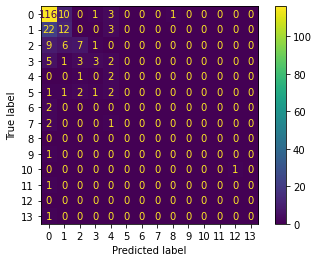

In [236]:
cm = confusion_matrix(y_val, rndmForest_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

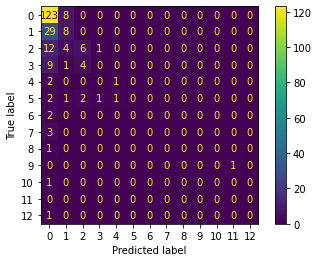

In [237]:
cm = confusion_matrix(y_val, rndmForest_opt_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Results

### Train

In [ ]:
random_state = 42
kernel = 1.0 * RBF(1.0)

Logistic_Regression = LogisticRegression(random_state= random_state, multi_class='multinomial', max_iter = 1000).fit(x_train, y_train.astype('int'))
#linearReg = LinearRegression().fit(x_train, y_train.astype('int'))
rndmForest = RandomForestClassifier(n_estimators=1000, class_weight="balanced", n_jobs=-1, min_samples_leaf=3, max_depth=5,
                                    random_state=random_state).fit(x_train, y_train.astype('int'))
                                                                   
#MLP = MLPClassifier(random_state=1, max_iter=5000).fit(x_train, y_train.astype('int'))

#Finding k value fom max accuracy
k_values=[]
for k in range(1, 51):
    KNeighbors = KNeighborsClassifier(n_neighbors=k, weights='distance').fit(x_train, y_train.astype('int'))
    KNeighbors_predictions = KNeighbors.predict(x_val)
    k_values.append(balanced_accuracy_score(y_val, KNeighbors_predictions))
k_max = k_values.index(max(k_values)) + 1

KNeighbors = KNeighborsClassifier(n_neighbors=k_max).fit(x_train, y_train.astype('int'))
CSupportVector = make_pipeline(StandardScaler(), SVC(gamma='auto')).fit(x_train, y_train.astype('int'))
DecisionTtree = DecisionTreeClassifier(random_state=0).fit(x_train, y_train.astype('int'))
# GaussianProcess = GaussianProcessClassifier(kernel=kernel,random_state=0).fit(x_train, y_train.astype('int'))
# AdaBoost = AdaBoostClassifier(n_estimators=1000, random_state=0).fit(x_train, y_train.astype('int'))
# GaussianNaiveBayes = GaussianNB().fit(x_train, y_train.astype('int'))
# QuadraticDiscriminantAnalysis = QuadraticDiscriminantAnalysis().fit(x_train, y_train.astype('int'))


LogisticRegression_predictions = Logistic_Regression.predict(x_train)
#linearReg_predictions = linearReg.predict(x_val)
rndmForest_predictions = rndmForest.predict(x_train)
#MLP_predictions = MLP.predict(x_val)
KNeighbors_predictions = KNeighbors.predict(x_train)
CSupportVector_predictions = CSupportVector.predict(x_train)
DecisionTtree_predictions = DecisionTtree.predict(x_train)
# GaussianProcess_predictions = GaussianProcess.predict(x_val)
# AdaBoost_predictions = AdaBoost.predict(x_val)
# GaussianNaiveBayes_predictions = GaussianNaiveBayes.predict(x_val)
# QuadraticDiscriminantAnalysis_predictions = QuadraticDiscriminantAnalysis.predict(x_val)


print('Accuracy of LogisticRegression classifier: ', accuracy_calculate(y_train, LogisticRegression_predictions))
#print('Accuracy of LinearRegression classifier: ', accuracy_calculate(y_val, linearReg_predictions))
print('Accuracy of RandomForest classifier: ', accuracy_calculate(y_train, rndmForest_predictions))
#print('Accuracy of Multi-layer Perceptron classifier: ', accuracy_calculate(y_val, MLP_predictions))
print('Accuracy of KNeighbors classifier: ', accuracy_calculate(y_train, KNeighbors_predictions))
print('Accuracy of CSupportVector classifier: ', accuracy_calculate(y_train, CSupportVector_predictions))
print('Accuracy of DecisionTtree classifier: ', accuracy_calculate(y_train, DecisionTtree_predictions))
#print('Accuracy of GaussianProcess classifier: ', accuracy_calculate(y_val, GaussianProcess_predictions))
#print('Accuracy of AdaBoost classifier: ', accuracy_calculate(y_val, AdaBoost_predictions))
#print('Accuracy of GaussianNaiveBayes classifier: ', accuracy_calculate(y_val, GaussianNaiveBayes_predictions))
#print('Accuracy of QuadraticDiscriminantAnalysis classifier: ', accuracy_calculate(y_val, QuadraticDiscriminantAnalysis_predictions))

#### Balanced Accuracy / train

In [ ]:
print('Balanced_Accuracy of LogisticRegression classifier: ', balanced_accuracy_score(y_train, LogisticRegression_predictions))
print('Balanced_Accuracy of RandomForest classifier: ', balanced_accuracy_score(y_train, rndmForest_predictions))
print('Balanced_Accuracy of KNeighbors classifier: ', balanced_accuracy_score(y_train, KNeighbors_predictions))
print('Balanced_Accuracy of CSupportVector classifier: ', balanced_accuracy_score(y_train, CSupportVector_predictions))
print('Balanced_Accuracy of DecisionTtree classifier: ', balanced_accuracy_score(y_train, DecisionTtree_predictions))

In [ ]:
### DENİYOZ İŞTE #################################################################

In [ ]:
# DecisionTtree = DecisionTreeClassifier(random_state=0, criterion='gini', min_samples_leaf=3, max_depth=20).fit(x_train, y_train.astype('int'))
# DecisionTtree_predictions = DecisionTtree.predict(x_train)
# print('Accuracy of DecisionTtree_predictions : ', accuracy_calculate(y_train, DecisionTtree_predictions))
# print('Balanced_Accuracy of DecisionTtree_predictions : ', balanced_accuracy_score(y_train, DecisionTtree_predictions))

# DecisionTtree_predictions = DecisionTtree.predict(x_val)
# print('Accuracy of DecisionTtree_predictions : ', accuracy_calculate(y_val, DecisionTtree_predictions))
# print('Balanced_Accuracy of DecisionTtree_predictions : ', balanced_accuracy_score(y_val, DecisionTtree_predictions))



In [ ]:
# Logistic_Regression = LogisticRegression(class_weight="balanced", multi_class="ovr", random_state= random_state, max_iter = 1000).fit(x_train, y_train.astype('int'))
# LogisticRegression_predictions = Logistic_Regression.predict(x_train)
# print('Accuracy of LogisticRegression classifier: ', accuracy_calculate(y_train, LogisticRegression_predictions))
# print('Balanced_Accuracy of LogisticRegression classifier: ', balanced_accuracy_score(y_train, LogisticRegression_predictions))

# LogisticRegression_predictions = Logistic_Regression.predict(x_val)
# print('Accuracy of LogisticRegression classifier: ', accuracy_calculate(y_val, LogisticRegression_predictions))
# print('Balanced_Accuracy of LogisticRegression classifier: ', balanced_accuracy_score(y_val, LogisticRegression_predictions))


In [ ]:
# svm = SGDClassifier(loss='log',class_weight="balanced", max_iter=2000).fit(x_train, y_train)
# predictions = svm.predict(x_val)
# print("accuracy: ",accuracy_score(predictions, y_val))
# print("accuracy: ",balanced_accuracy_score(predictions, y_val))

In [ ]:
###############################################################

#### LogisticRegression / train

In [ ]:
print("balanced_accuracy: ",balanced_accuracy_score(y_train, LogisticRegression_predictions))
print("accuracy: ",accuracy_score(y_train, LogisticRegression_predictions))
print("precision: ",precision_score(y_train, LogisticRegression_predictions,average='weighted'))
print("recall: ",recall_score(y_train, LogisticRegression_predictions,average='weighted'))
print("f1 score: ",f1_score(y_train, LogisticRegression_predictions,average='weighted'))

cm = confusion_matrix(y_train, LogisticRegression_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
mean_iou_calculator(y_train, LogisticRegression_predictions, "time")

#### RandomForestClassifier / train

In [ ]:
print("balanced_accuracy: ",balanced_accuracy_score(y_train, rndmForest_predictions))
print("accuracy: ",accuracy_score(y_train, rndmForest_predictions))
print("precision: ",precision_score(y_train, rndmForest_predictions,average='weighted'))
print("recall: ",recall_score(y_train, rndmForest_predictions,average='weighted'))
print("f1 score: ",f1_score(y_train, rndmForest_predictions,average='weighted'))

cm = confusion_matrix(y_train, rndmForest_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
mean_iou_calculator(y_train, rndmForest_predictions, "time")

#### KNeighborsClassifier  / train

In [ ]:
print("balanced_accuracy: ",balanced_accuracy_score(y_train, KNeighbors_predictions))
print("accuracy: ",accuracy_score(y_train, KNeighbors_predictions))
print("precision: ",precision_score(y_train, KNeighbors_predictions,average='weighted'))
print("recall: ",recall_score(y_train, KNeighbors_predictions,average='weighted'))
print("f1 score: ",f1_score(y_train, KNeighbors_predictions,average='weighted'))

cm = confusion_matrix(y_train, KNeighbors_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
mean_iou_calculator(y_train, rndmForest_predictions, "time")

#### CSupportVector  / train

In [ ]:
print("balanced_accuracy: ",balanced_accuracy_score(y_train, CSupportVector_predictions))
print("accuracy: ",accuracy_score(y_train, CSupportVector_predictions))
print("precision: ",precision_score(y_train, CSupportVector_predictions,average='weighted'))
print("recall: ",recall_score(y_train, CSupportVector_predictions,average='weighted'))
print("f1 score: ",f1_score(y_train, CSupportVector_predictions,average='weighted'))

cm = confusion_matrix(y_train, CSupportVector_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
mean_iou_calculator(y_train, CSupportVector_predictions, "time")

## Test

In [ ]:
# # random_state = 42
# # kernel = 1.0 * RBF(1.0)

# # Logistic_Regression = LogisticRegression(random_state= random_state, max_iter = 1000).fit(x_train, y_train.astype('int'))
# # #linearReg = LinearRegression().fit(x_train, y_train.astype('int'))
# # rndmForest = RandomForestClassifier(n_estimators=1000, class_weight="balanced", n_jobs=-1, min_samples_leaf=3, max_depth=5,
# #                                     random_state=random_state).fit(x_train, y_train.astype('int'))
                                                                   
# # #MLP = MLPClassifier(random_state=1, max_iter=5000).fit(x_train, y_train.astype('int'))

# # #Finding k value fom max accuracy
# # k_values=[]
# # for k in range(1, 51):
# #     KNeighbors = KNeighborsClassifier(n_neighbors=k).fit(x_train, y_train.astype('int'))
# #     KNeighbors_predictions = KNeighbors.predict(x_val)
# #     k_values.append(accuracy_calculate(y_val, KNeighbors_predictions))

# # k_max = k_values.index(max(k_values)) + 1
# KNeighbors = KNeighborsClassifier(n_neighbors=k_max).fit(x_train, y_train.astype('int'))
# CSupportVector = make_pipeline(StandardScaler(), SVC(gamma='auto')).fit(x_train, y_train.astype('int'))
# DecisionTtree = DecisionTreeClassifier(random_state=0).fit(x_train, y_train.astype('int'))
# # GaussianProcess = GaussianProcessClassifier(kernel=kernel,random_state=0).fit(x_train, y_train.astype('int'))
# # AdaBoost = AdaBoostClassifier(n_estimators=1000, random_state=0).fit(x_train, y_train.astype('int'))
# # GaussianNaiveBayes = GaussianNB().fit(x_train, y_train.astype('int'))
# # QuadraticDiscriminantAnalysis = QuadraticDiscriminantAnalysis().fit(x_train, y_train.astype('int'))


LogisticRegression_predictions = Logistic_Regression.predict(x_val)
#linearReg_predictions = linearReg.predict(x_val)
rndmForest_predictions = rndmForest.predict(x_val)
#MLP_predictions = MLP.predict(x_val)
KNeighbors_predictions = KNeighbors.predict(x_val)
CSupportVector_predictions = CSupportVector.predict(x_val)
DecisionTtree_predictions = DecisionTtree.predict(x_val)
# GaussianProcess_predictions = GaussianProcess.predict(x_val)
# AdaBoost_predictions = AdaBoost.predict(x_val)
# GaussianNaiveBayes_predictions = GaussianNaiveBayes.predict(x_val)
# QuadraticDiscriminantAnalysis_predictions = QuadraticDiscriminantAnalysis.predict(x_val)


print('Accuracy of LogisticRegression classifier: ', accuracy_calculate(y_val, LogisticRegression_predictions))
#print('Accuracy of LinearRegression classifier: ', accuracy_calculate(y_val, linearReg_predictions))
print('Accuracy of RandomForest classifier: ', accuracy_calculate(y_val, rndmForest_predictions))
#print('Accuracy of Multi-layer Perceptron classifier: ', accuracy_calculate(y_val, MLP_predictions))
print('Accuracy of KNeighbors classifier: ', accuracy_calculate(y_val, KNeighbors_predictions))
print('Accuracy of CSupportVector classifier: ', accuracy_calculate(y_val, CSupportVector_predictions))
print('Accuracy of DecisionTtree classifier: ', accuracy_calculate(y_val, DecisionTtree_predictions))
#print('Accuracy of GaussianProcess classifier: ', accuracy_calculate(y_val, GaussianProcess_predictions))
#print('Accuracy of AdaBoost classifier: ', accuracy_calculate(y_val, AdaBoost_predictions))
#print('Accuracy of GaussianNaiveBayes classifier: ', accuracy_calculate(y_val, GaussianNaiveBayes_predictions))
#print('Accuracy of QuadraticDiscriminantAnalysis classifier: ', accuracy_calculate(y_val, QuadraticDiscriminantAnalysis_predictions))

In [ ]:
# rndmForest = RandomForestClassifier(n_estimators=1000, class_weight="balanced", n_jobs=-1, min_samples_leaf=3, max_depth=5,
#                                     random_state=random_state).fit(x_train, y_train.astype('int'))
# rndmForest_predictions = rndmForest.predict(x_val)
# print('Accuracy of RandomForest classifier: ', accuracy_calculate(y_val, rndmForest_predictions))
# print('Balanced_Accuracy of RandomForest classifier: ', balanced_accuracy_score(y_val, rndmForest_predictions))
# rndmForest_predictions = rndmForest.predict(x_train)
# print('Accuracy of RandomForest classifier: ', accuracy_calculate(y_train, rndmForest_predictions))
# print('Balanced_Accuracy of RandomForest classifier: ', balanced_accuracy_score(y_train, rndmForest_predictions))

#### Balanced Accuracy / test

In [ ]:
print('Balanced_Accuracy of LogisticRegression classifier: ', balanced_accuracy_score(y_val, LogisticRegression_predictions))
print('Balanced_Accuracy of RandomForest classifier: ', balanced_accuracy_score(y_val, rndmForest_predictions))
print('Balanced_Accuracy of KNeighbors classifier: ', balanced_accuracy_score(y_val, KNeighbors_predictions))
print('Balanced_Accuracy of CSupportVector classifier: ', balanced_accuracy_score(y_val, CSupportVector_predictions))
print('Balanced_Accuracy of DecisionTtree classifier: ', balanced_accuracy_score(y_val, DecisionTtree_predictions))

#### LogisticRegression

In [ ]:
print("balanced_accuracy: ",balanced_accuracy_score(y_val, LogisticRegression_predictions))
print("accuracy: ",accuracy_score(y_val, LogisticRegression_predictions))
print("precision: ",precision_score(y_val, LogisticRegression_predictions,average='weighted'))
print("recall: ",recall_score(y_val, LogisticRegression_predictions,average='weighted'))
print("f1 score: ",f1_score(y_val, LogisticRegression_predictions,average='weighted'))

cm = confusion_matrix(y_val, LogisticRegression_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
len(y_val)

In [ ]:
mean_iou_calculator(y_val, LogisticRegression_predictions, "time")

#### RandomForestClassifier

In [ ]:
print("balanced_accuracy: ",balanced_accuracy_score(y_val, rndmForest_predictions))
print("accuracy: ",accuracy_score(y_val, rndmForest_predictions))
print("precision: ",precision_score(y_val, rndmForest_predictions,average='weighted'))
print("recall: ",recall_score(y_val, rndmForest_predictions,average='weighted'))
print("f1 score: ",f1_score(y_val, rndmForest_predictions,average='weighted'))

cm = confusion_matrix(y_val, rndmForest_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
mean_iou_calculator(y_val, rndmForest_predictions, "time")

#### KNeighborsClassifier

In [ ]:
print("balanced_accuracy: ",balanced_accuracy_score(y_val, KNeighbors_predictions))
print("accuracy: ",accuracy_score(y_val, KNeighbors_predictions))
print("precision: ",precision_score(y_val, KNeighbors_predictions,average='weighted'))
print("recall: ",recall_score(y_val, KNeighbors_predictions,average='weighted'))
print("f1 score: ",f1_score(y_val, KNeighbors_predictions,average='weighted'))

cm = confusion_matrix(y_val, KNeighbors_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
mean_iou_calculator(y_val, KNeighbors_predictions, "time")

#### CSupportVector

In [ ]:
print("balanced_accuracy: ",balanced_accuracy_score(y_val, CSupportVector_predictions))
print("accuracy: ",accuracy_score(y_val, CSupportVector_predictions))
print("precision: ",precision_score(y_val, CSupportVector_predictions,average='weighted'))
print("recall: ",recall_score(y_val, CSupportVector_predictions,average='weighted'))
print("f1 score: ",f1_score(y_val, CSupportVector_predictions,average='weighted'))

cm = confusion_matrix(y_val, CSupportVector_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
mean_iou_calculator(y_val, CSupportVector_predictions, "time")

# Take input and create df_inp 

In [ ]:
def is_prod_in_data(df):
    prods = df["product"].unique()
    prd = str(input("Product seç: "))
    if prd not in prods: 
        return False, prd
    else:
        return True, prd
    
def is_prod_in_data_drop(df, prd):
    prods = df["product"].unique()
    if prd not in prods: 
        return False
    else:
        return True

In [ ]:
def take_input(df, prd):
    amo = input("Amount: ") 
    y = False
    while y == False:
        if (amo.isnumeric() == False):
            print("Pozitif tam sayı değer giriniz")
            amo = input("Amount: ")

        else:
            d = max(df[df["product"] == prd]["amount"].to_list()) * 3
            if int(amo) > d:
                print("Amount yüksek abi emin misin bak !?")
                y_n = input("y / n ?")
                if y_n == "y":
                    y = True
                elif y_n == "n":
                    amo = input("Amount: ")                   
            else:
                y = True
    amo = int(amo)

    w_days = ['pts', 'sal', 'çrş', 'prş', 'cum', 'cts', 'paz']
    wd = str(input("Week day: "))
    z = False
    while z == False:
        if wd not in w_days:
            print("Geçerli gün giriniz...")
            print("Geçerli günler: ", w_days)
            wd = str(input("Week day: "))
        else:
            z = True

    typ = df[df["product"] == prd]["type"].unique()[0] 
    comps = df[df["product"] == prd]["company"].unique()
    tws = df[df["product"] == prd]["town"].unique()

    df_inp = pd.DataFrame(columns = ['product', 'company', 'amount', 'town', 'type', 'week day'])

    for comp in comps:
        tw = df[(df["product"] == prd) & (df["company"] == comp)]["town"].unique()[0]

        df_inp = df_inp.append({'product' : prd, 'company' : comp, 'amount' : amo, 'town' : tw,'type' : typ,
                            'week day' : wd}, ignore_index=True)

    return df_inp, comps

# Take Input !!!!!!!!!!!!
##### yetersiz datalardaysa ve farklı şirketlerden tedarik edilmişse ayrı ayrı ortalama süre verilebilir

In [ ]:
def run():
    #c = True
    cond1 = False ###
    #while c:
    while cond1 == False: ###
        tf, prd = is_prod_in_data(data_clean)
        
        if tf:
            df_inp, comps = take_input(data_clean, prd)
            c = False
            cond1 = True
        else:
            if (is_prod_in_data_drop(drop_df, prd) == True):
                print("Güvenilir sonuç için product'a ait en az 5 giriş bulunmalıdır.")
                print("\n","Daha önce bu product alımları: ")
                a = drop_df[drop_df["product"] == prd]
                a = a.index.to_list()
                a = data.loc[a]
                df_inp = display(a[['company', 'amount', 'town', 'order date', 'delivery date', 'time']].style.hide(axis='index'))
                print ("Ortalama miktar = ", a["amount"].mean(), "Ortalama süre = ", a["time"].mean())
                comps = a["company"].unique()
                return df_inp, cond1, comps
    
            else:
                df_inp = print("Product bulunamadı.")
    if cond1:
        df_inp  = one_hot(df_inp, "week day")
        df_inp  = one_hot(df_inp, "product")
        df_inp  = one_hot(df_inp, "company")

        df_inp = df_inp.drop('town',axis = 1).reset_index(drop=True)

        df_inp["amount"] = (df_inp["amount"] - xt_min) / (xt_max - xt_min)

        df_inp = df_empty.append(df_inp)   # for the next version of pandas use the next line of code instead of this one. 
        #df_inp = pd.concat([df_inp, df_empty])   ------->>> for the future version of pandas
        
        df_inp = df_inp.fillna(0)
        df_inp = pca.transform(df_inp)
        
    return df_inp, cond1, comps
        

In [ ]:
df_inp, cond1, comps = run()

# Predict

In [ ]:
if cond1:
    LR = Logistic_Regression.predict(df_inp)
    RF = rndmForest.predict(df_inp)
    KN = KNeighbors.predict(df_inp)
    CSV = CSupportVector.predict(df_inp)
    print("LR: ", LR, "\nRF:", RF, "\nKN:", KN, "\nCSV:", CSV)
    
    res = np.array([])
    output = np.array([])
    for i in range(len(LR)):
        res = np.append(res, [LR[i], RF[i], KN[i], CSV[i]])
        m = mode(res)[0][0]
        output = np.append(output, m)
        res = np.array([])
    
    print("for company ", comps[i], " predicted time = ", output[i])

In [ ]:
del(df_inp)